# Aligning Molecules

One of the most important things enabling us to have success in drug discovery is understanding structure-activity relationship (SAR). This is a foundation that explains how the structure of a molecule relates to its biological activity. Here is an excerpt from [CDDVault](https://info.collaborativedrug.com/tofu-content-what-is-sar#:~:text=Structure%20Activity%20Relationships%20(SAR)%20can,to%20further%20characterize%20existing%20molecules.) that explains the importance of SAR in drug discovery: 

”SAR depends on the recognition of which structural characteristics correlate with chemical and biological reactivity. Thus the ability to draw conclusions about an unknown compound depends upon both the structural features that can be characterized as well as the database of molecules against which they are compared. When combined with appropriate professional judgment, SAR can be a powerful tool for understanding functional implications when similarities are found. For example, in the case of risk assessment of uncharacterized compounds, data from the most sensitive toxicological endpoints should be included in the analysis, such as carcinogenicity or cardiotoxicity.”

This is where aligning molecules can be useful. Given the importance of structure, aligning molecules is generally useful for a few things: 

1. Aligning molecules makes it easier to visualize and highlight substructures
2. It can help you identify and understand any shared structures between drug candidates
3. It can help you identify any potential activity patterns
    1. For example, when analyzing [activity cliffs](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6740043/#:~:text=Activity%20cliffs%20(ACs)%20are%20generally,that%20strongly%20influence%20biological%20activity.) - “defined as pairs or groups of structurally similar compounds that are active against the same target but have large differences in potency. Activity cliffs capture chemical modifications that strongly influence biological activity”. An example of some compounds with activity cliffs and their structural differences highlighted are shown below: 

![Untitled](images/Aligning_1.png)

[Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6740043/#:~:text=Activity%20cliffs%20(ACs)%20are%20generally,that%20strongly%20influence%20biological%20activity.)

**Note:** The concept of an activity cliff seems simple in this example, however, in practice it is extremely complicated to represent them computationally and derive a systematic approach for identification. Read more about the evolving concept of activity cliffs [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6740043/#:~:text=Activity%20cliffs%20(ACs)%20are%20generally,that%20strongly%20influence%20biological%20activity.). 

As an example to show you how alignment makes visualization easier, please see the image below. The alignment of this sample dataset makes it extremely easy to identify the core structure of 3 rings which are common in all compounds. 

![Untitled](images/Aligning_2.png)

[Source](https://ctr.fandom.com/wiki/Align_the_depiction_using_a_fixed_substructure)

## Tutorial

This tutorial will show you how to: 

1. Partition a list of molecules into clusters sharing a common scaffold of a common core, then align the molecules to that common core. 
    1. **Note:** this function will compute the list of smiles/smarts representative of each cluster first.
2. Aligning molecules according to a template molecule

## Datamol example

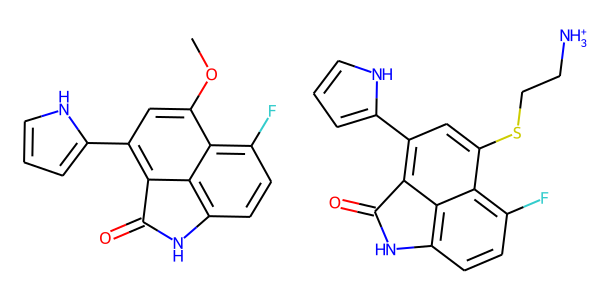

In [10]:
import datamol as dm

data = dm.data.cdk2()[13:15]
smiles = data["smiles"].iloc[:].tolist()
mols = [dm.to_mol(s) for s in smiles]

dm.to_image(mols, use_svg=False)

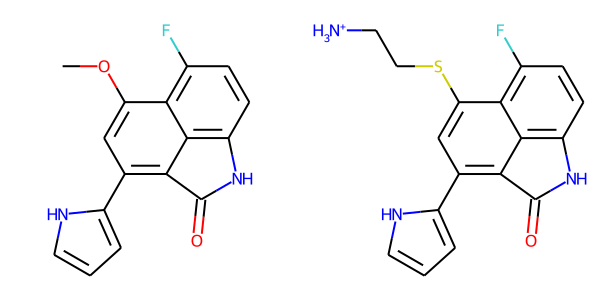

In [9]:
aligned_list = dm.align.auto_align_many(mols)
dm.to_image(aligned_list, use_svg=False)

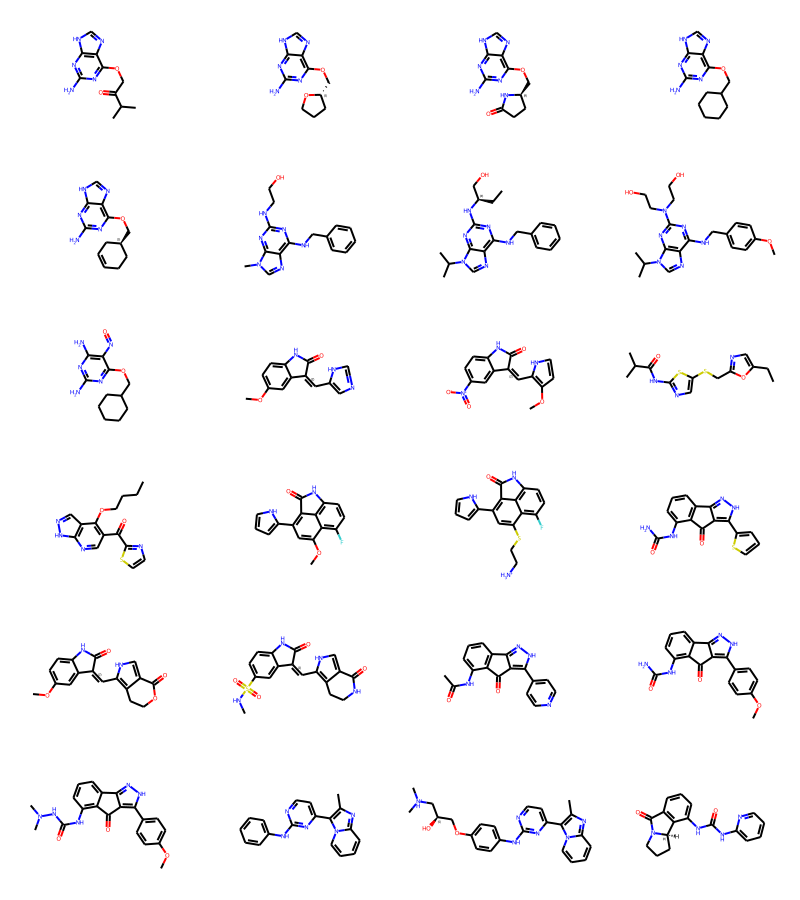

In [11]:
# Align the compounds within each cluster in a set of compounds
data = dm.data.cdk2()[0:24]
smiles = data["smiles"].iloc[:].tolist()
mols = [dm.to_mol(s) for s in smiles]

aligned_list = dm.align.auto_align_many(mols, partition_method="cluster")
dm.to_image(aligned_list, mol_size=(200, 150), use_svg=False)

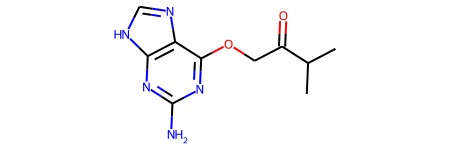

In [12]:
# You can also align a compound to a template compound
# In this example, we want to align the compound mols[0] with the compound mols[7]
mols[0]

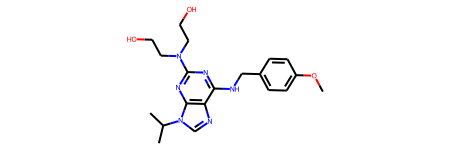

In [13]:
mols[7]

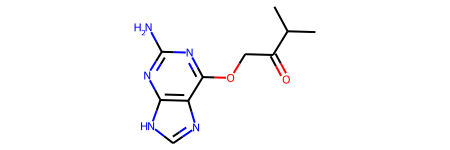

In [14]:
mol_aligned = dm.align.template_align(mols[0], template=mols[7])
mol_aligned

## References

- [TeachOpenCADD](https://projects.volkamerlab.org/teachopencadd/talktorials/T006_compound_maximum_common_substructures.html?highlight=align#Quiz)
- [RDKit Cookbook](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolAlign.html)